
**Importing the librarices **

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

**Data Collection**

In [5]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate Analysis

In [7]:
customer_data.shape

(200, 5)

In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


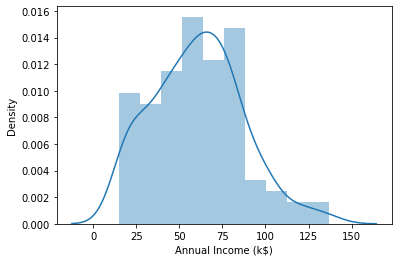

In [38]:
sns.distplot(customer_data['Annual Income (k$)']);

In [39]:
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

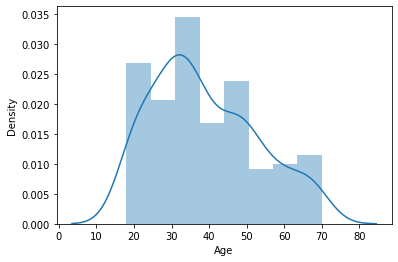

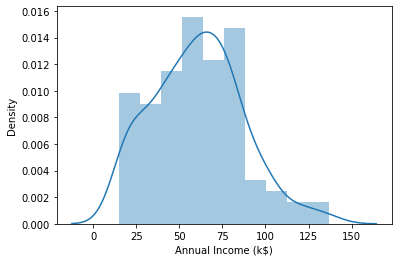

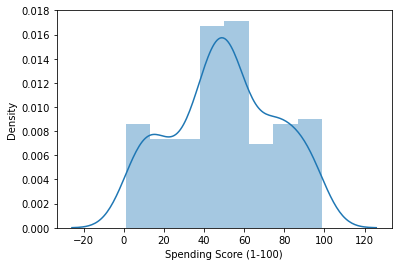

In [41]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns :
  plt.figure()
  sns.distplot(customer_data[i])

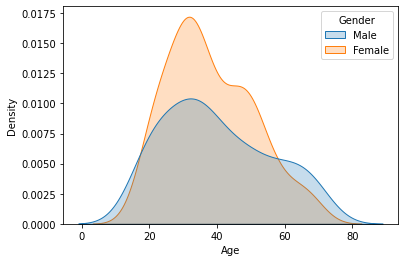

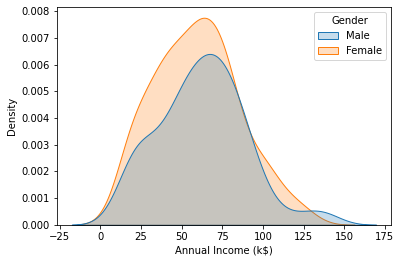

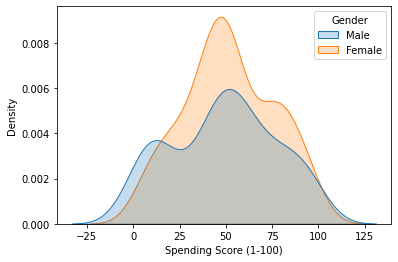

In [42]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns :
  plt.figure()
  sns.kdeplot(customer_data[i], shade = True, hue = customer_data['Gender'])

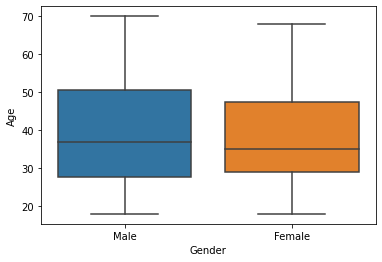

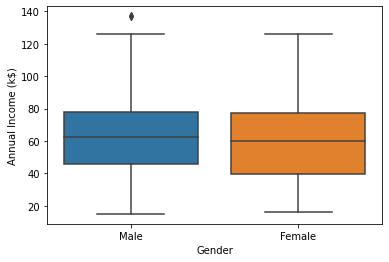

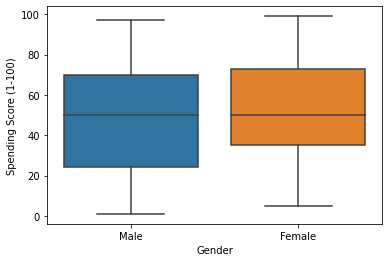

In [43]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns :
  plt.figure()
  sns.boxplot(data= customer_data, x = 'Gender', y = customer_data[i])

In [44]:
customer_data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [45]:
customer_data['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

Bivariate Analysis

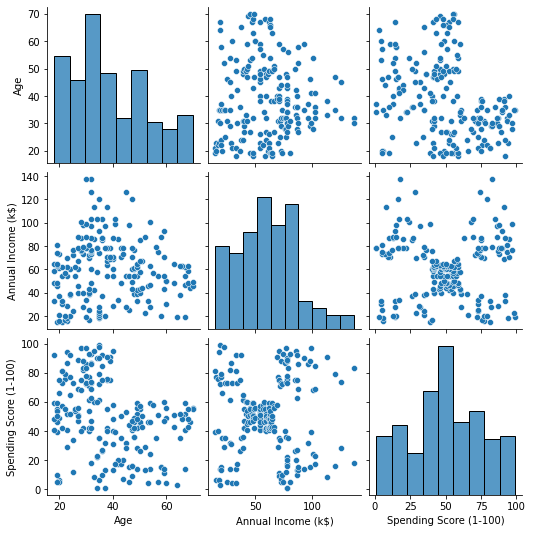

In [47]:
customer_data=customer_data.drop('CustomerID', axis = 1)
sns.pairplot(customer_data)

In [48]:
customer_data.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [49]:
customer_data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


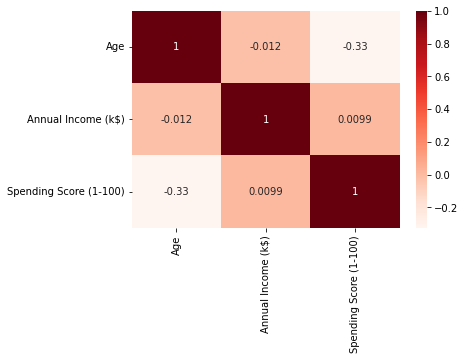

In [52]:
sns.heatmap(customer_data.corr(), annot = True, cmap = 'Reds');

**Clustering - Univariate, Bivariate, Multivariate**

---



In [71]:
clustering1 = KMeans(n_clusters = 3 )
clustering1.fit(customer_data[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [72]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [73]:
customer_data['Income Cluster'] = clustering1.labels_
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score & Income Cluster,Spending & Income Cluster
0,Male,19,15,39,1,3,2
1,Male,21,15,81,1,4,3
2,Female,20,16,6,1,3,2
3,Female,23,16,77,1,4,3
4,Female,31,17,40,1,3,2


In [74]:
customer_data['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [75]:
clustering1.inertia_

23517.33093093093

In [76]:
inertia_score = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(customer_data[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

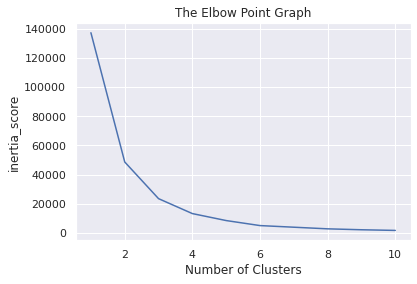

In [77]:
sns.set()
plt.plot(range(1,11),inertia_score)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia_score')
plt.show()

Bivariate

In [78]:
customer_data.groupby(['Income Cluster'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [79]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
customer_data['Spending & Income Cluster'] = clustering2.labels_
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score & Income Cluster,Spending & Income Cluster
0,Male,19,15,39,1,3,1
1,Male,21,15,81,1,4,4
2,Female,20,16,6,1,3,1
3,Female,23,16,77,1,4,4
4,Female,31,17,40,1,3,1


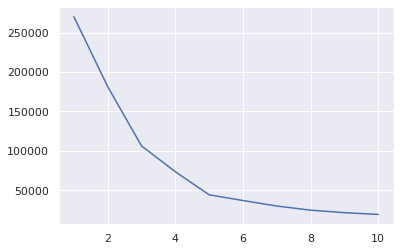

In [80]:
inertia_score2 = []
for i in range (1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_score2.append(kmeans2.inertia_)

plt.plot(range(1,11),inertia_score2);

In [95]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

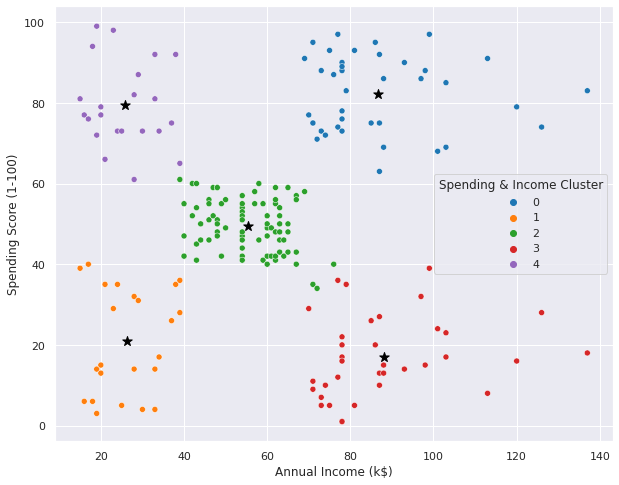

In [109]:
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c  = 'black', marker = '*')
sns.scatterplot(data = customer_data, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending & Income Cluster', palette = 'tab10' );
plt.savefig('Clustering_Bivariate.png')

In [97]:
pd.crosstab(customer_data['Spending & Income Cluster'], customer_data['Gender'], normalize = 'index')

Gender,Female,Male
Spending & Income Cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.592593,0.407407
3,0.457143,0.542857
4,0.590909,0.409091


In [98]:
customer_data.groupby(['Spending & Income Cluster'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending & Income Cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,42.716049,55.296296,49.518519
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


Multivariate Clustering

In [102]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [103]:
customer_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score & Income Cluster,Spending & Income Cluster
0,Male,19,15,39,1,3,1
1,Male,21,15,81,1,4,4
2,Female,20,16,6,1,3,1
3,Female,23,16,77,1,4,4
4,Female,31,17,40,1,3,1


In [104]:
df = pd.get_dummies(customer_data, drop_first = True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score & Income Cluster,Spending & Income Cluster,Gender_Male
0,19,15,39,1,3,1,1
1,21,15,81,1,4,4,1
2,20,16,6,1,3,1,0
3,23,16,77,1,4,4,0
4,31,17,40,1,3,1,0


In [105]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending Score & Income Cluster', 'Spending & Income Cluster',
       'Gender_Male'],
      dtype='object')

In [ ]:
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]

In [106]:
df = scale.fit_transform(df)

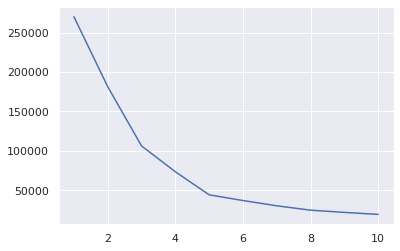

In [107]:
inertia_score3 = []
for i in range (1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(customer_data[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_score3.append(kmeans3.inertia_)

plt.plot(range(1,11),inertia_score3);

In [112]:
customer_data.to_csv('Clustering.csv')

In [113]:
customer_data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending Score & Income Cluster,Spending & Income Cluster
0,Male,19,15,39,1,3,1
1,Male,21,15,81,1,4,4
2,Female,20,16,6,1,3,1
3,Female,23,16,77,1,4,4
4,Female,31,17,40,1,3,1
...,...,...,...,...,...,...,...
195,Female,35,120,79,2,5,0
196,Female,45,126,28,2,6,3
197,Male,32,126,74,2,5,0
198,Male,32,137,18,2,6,3
